# Support Vector Machines

https://jgreitemann.github.io/svm-demo

Support vector machines ou m√°quina de vetores de suporte (SVMs) √© uma classe de algoritmos particularmente poderosa. Nesta aula vamos entender como funciona este algoritmo em como us√°-lo em problemas de classifica√ß√£o.


Vamos come√ßar importando as bibliotecas:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

Na aula passada vimos que o classificador KNN calcula a dist√¢ncia de um novo dado para todos os dados presentes na base de trainamento para verificar quais s√£o os vizinhos mais pr√≥ximos e ent√£o atribuir uma classe para este dado. 

Nesta aula iremos aprender sobre o SVM, que √© um classificador discriminativo linear, ou seja, ele vai calcular uma fronteira entre as classes presentes no dados. 

Vamos partir para um exemplo. Considere um simples case de uma tarefa de classifica√ß√£o onde as duas classes s√£o bem separadas. 

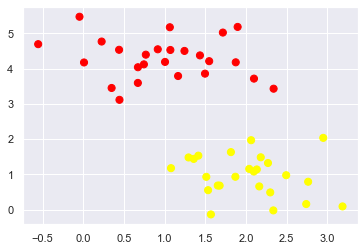

In [4]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

Como dito, o SVM vai tentar desenhar uma fronteira que separa os dois conjuntos dados e assim criando um modelo de classifica√ß√£o. 

Para um exemplo bi-dimensional como mostrado acima, n√≥s podemos tentar tra√ßar esta linha manualemnte. Mas imediatamente vemos um problem: Existe mais de uma possibilidade de tra√ßar uma fronteira que possa discriminar perfeitamente as duas clases! 

Podemos fazer da seguinte maneira:

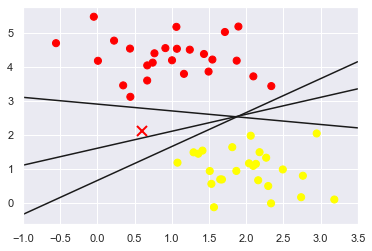

In [12]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

Podemos observar que estas s√£o fronteiras muito diferentes, que entretanto, perfeitamente discriminam as duas classes. Dependendo da fronteira que vc escolher, o novo dado (o "X" vermelho) pode ser atribuido a classe amarela ou vermelha. 

Evidentemente, vemos que apenas desenhar linhas entre as classes n√£o √© o suficiente. Logo precisamos de uma t√©cnica mais sofisticada. 

## Support Vector Machines: Maximizando as margens.

Support vector machines oferecem uma nova maneira de melhores isto.
A ideia central √© ao inv√©s de simplesmente desnhar fronteiras, podemos definir margens entorno de cada linha cuja largura vai at√© o ponto mais pr√≥ximo daquela linha. 

Vejamos:


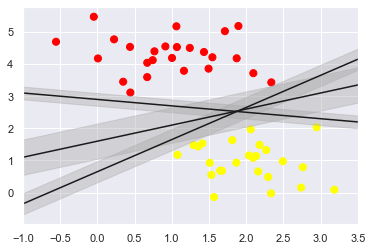

In [18]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

Para o SVM a fronteira que maximizar esta margem √© a fronteira √≥tima de separa√ß√£o dos dados. 


### Treinando um SVM

Vamos ver o resultado de real de como o SVM encontra estas fronteiras. 

Neste momento, n√≥s vamos usar um kernel linear e configurar o par√¢metro ``C`` alto. Ele controla o trade-off entre o limite de decis√£o suave e a classifica√ß√£o correta dos pontos de treinamento. Um grande valor de c significa que voc√™ receber√° mais pontos de treinamento corretamente.

In [34]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

Fun√ß√£o para plotar a fronteira de decis√£o

In [35]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

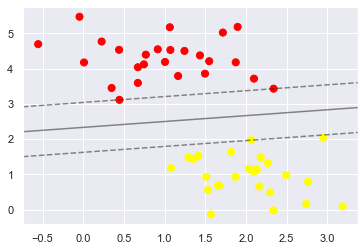

In [36]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

Esta √© a linha divis√≥ria que maximiza a margem entre os dois conjuntos de pontos. Observe que alguns dos pontos de treinamento apenas tocam a margem: eles s√£o indicados pelos c√≠rculos negros nesta figura. Estes pontos s√£o os elementos centrais deste ajuste, e s√£o conhecidos como os vetores de suporte, e d√£o ao algoritmo seu nome. No Scikit-Learn, a identidade destes pontos √© armazenada no atributo support_vectors_ do classificador:


In [38]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

Uma chave para o sucesso deste classificador √© que para o ajuste, somente a posi√ß√£o dos vetores de suporte importa; quaisquer pontos mais distantes da margem que estejam do lado correto n√£o modificam o ajuste! Tecnicamente, isto √© porque estes pontos n√£o contribuem para a fun√ß√£o de perda usada para se ajustar ao modelo, portanto, sua posi√ß√£o e n√∫mero n√£o importam, desde que n√£o cruzem a margem.

Podemos ver isto, por exemplo, se tra√ßarmos o modelo aprendido dos primeiros 60 pontos e dos primeiros 120 pontos deste conjunto de dados:



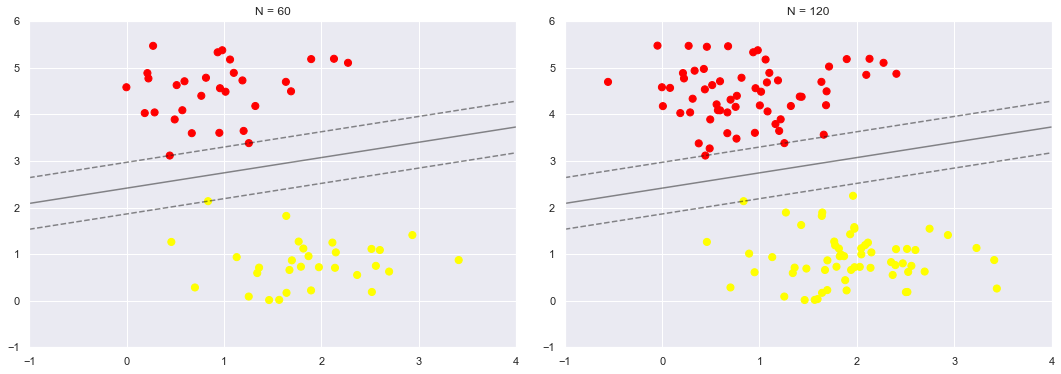

In [39]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

No painel da esquerda, vemos o modelo e os vetores de apoio para 60 pontos de treinamento. No painel direito, duplicamos o n√∫mero de pontos de treinamento, mas o modelo n√£o mudou: os tr√™s vetores de suporte do painel esquerdo ainda s√£o os vetores de suporte do painel direito. Esta insensibilidade ao comportamento exato dos pontos distantes √© um dos pontos fortes do modelo SVM.

Se voc√™ estiver rodando este notebook ao vivo, voc√™ pode usar os widgets interativos do IPython para visualizar esta caracter√≠stica do modelo SVM de forma interativa:

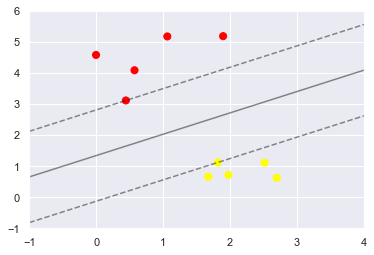

In [42]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None));

### Al√©m das fronteiras lineares: Kernel SVM

Onde a SVM se torna extremamente poderosa √© quando √© combinada com os kernels.
Kernels s√£o um conjunto de fun√ß√µes matem√°ticas que tomam os dados como entrada e transforma-os na forma requerida. Diferentes algoritmos SVM utilizam diferentes tipos de fun√ß√µes do kernel. Estas fun√ß√µes podem ser de diferentes tipos. Por exemplo, fun√ß√£o de base linear, n√£o linear, polinomial, radial (RBF), e sigm√≥ide.

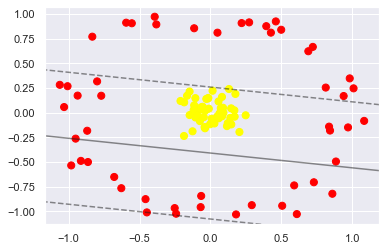

In [44]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

√â evidente que nenhuma discrimina√ß√£o linear ser√° capaz de separar estes dados. Mas podemos projetar os dados em uma dimens√£o mais elevada, de modo que um separador linear seja suficiente. Por exemplo, uma proje√ß√£o simples que poder√≠amos usar seria calcular uma fun√ß√£o de base radial:

In [48]:
r = np.exp(-(X ** 2).sum(1))

Podemos visualizar esta dimens√£o de dados extra usando um gr√°fico tridimensional 

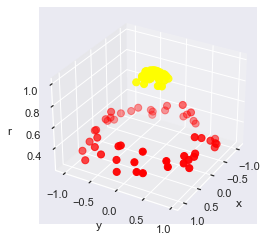

In [49]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(X[:, 0], X[:, 1], r,  c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
plot_3D()

Podemos ver que com esta dimens√£o adicional, os dados se tornam trivialmente separ√°veis linearmente, desenhando um plano de separa√ß√£o em, digamos, r=0,7.

Aqui tivemos que escolher e ajustar cuidadosamente nossa proje√ß√£o: se n√£o tiv√©ssemos centrado nossa fun√ß√£o de base radial no local correto, n√£o ter√≠amos visto resultados t√£o limpos e linearmente separ√°veis. Em geral, a necessidade de fazer tal escolha √© um problema: gostar√≠amos de, de alguma forma, encontrar automaticamente as melhores fun√ß√µes de base a serem utilizadas.

Uma estrat√©gia para este fim √© calcular uma fun√ß√£o base centrada em cada ponto do conjunto de dados, e deixar que o algoritmo SVM peneirar os resultados. Este tipo de transforma√ß√£o da fun√ß√£o base √© conhecida como transforma√ß√£o do kernel, pois se baseia em uma rela√ß√£o de similaridade (ou kernel) entre cada par de pontos.

Um problema potencial com esta estrat√©gia - projetando ùëÅ pontos em dimens√µes ùëÅ - √© que ela pode se tornar muito computacionalmente intensiva √† medida que ùëÅ se torna grande. Entretanto, devido a um pequeno procedimento conhecido como o  [*kernel trick*](https://en.wikipedia.org/wiki/Kernel_trick), um ajuste nos dados transformados em kernel pode ser feito implicitamente - isto √©, sem nunca construir a representa√ß√£o completa ùëÅ -dimensional da proje√ß√£o do kernel! Este truque do kernel est√° embutido na SVM, e √© uma das raz√µes pelas quais o m√©todo √© t√£o poderoso.

No Scikit-Learn, podemos aplicar SVM kernelizado simplesmente mudando nosso kernel linear para um kernel RBF (fun√ß√£o de base radial), usando o modelo de kernel hyperparameter:

In [50]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

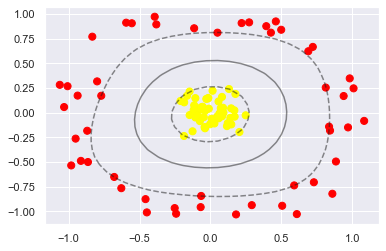

In [52]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

Usando esta m√°quina vetorial de suporte kernelizado, aprendemos um limite de decis√£o n√£o linear adequado. Esta estrat√©gia de transforma√ß√£o do n√∫cleo √© usada freq√ºentemente no aprendizado da m√°quina para transformar m√©todos lineares r√°pidos em m√©todos n√£o lineares r√°pidos, especialmente para modelos nos quais o kernel trick pode ser usado.

### Melhorando o SVM: Suavizando as Margens

ossa discuss√£o at√© agora tem se centrado em torno de conjuntos de dados muito limpos, nos quais existe um limite de decis√£o perfeito.
Mas e se seus dados tiverem alguma quantidade de sobreposi√ß√£o?
Por exemplo, voc√™ pode ter dados como este:

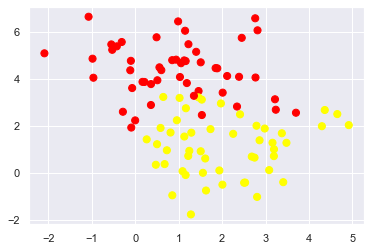

In [53]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

Para lidar com este caso, a implementa√ß√£o da SVM tem um parametro que "suaviza" a margem: isto √©, permite que alguns dos pontos penetrem na margem se isso permitir um melhor ajuste. A rigidez da margem √© controlada por um par√¢metro de afina√ß√£o, mais freq√ºentemente conhecido como ùê∂ . Para um ùê∂ muito grande, a margem √© dura, e os pontos n√£o podem estar nela. Para o menor ùê∂ , a margem √© mais suave, e pode ser aumentada para abranger alguns pontos.

A figura mostrada abaixo d√° uma id√©ia visual de como um par√¢metro ùê∂ vari√°vel afeta o ajuste final, atrav√©s do amolecimento da margem:

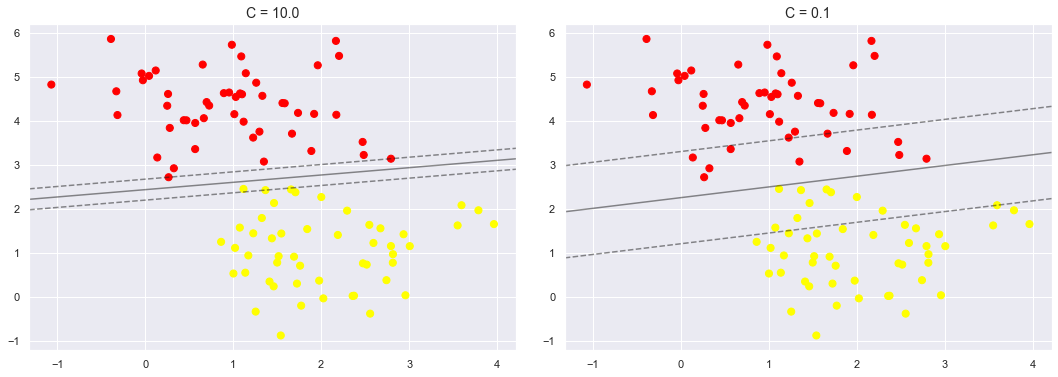

In [54]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

O valor √≥timo do par√¢metro ùê∂ depender√° de seu conjunto de dados, e deve ser ajustado usando a valida√ß√£o cruzada ou um procedimento similar

## Examplo: Reconhecimento Facial

Como exemplo do SVM em a√ß√£o, vamos dar uma olhada no problema de reconhecimento facial.
Vamos utilizar o conjunto de dados Labeled Faces in the Wild, que consiste em v√°rios milhares de fotos coletadas de v√°rias figuras p√∫blicas.
Um buscador para o conjunto de dados est√° incorporado no Scikit-Learn:

In [65]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


Vamos tra√ßar alguns desses rostos para ver com o que estamos trabalhando:


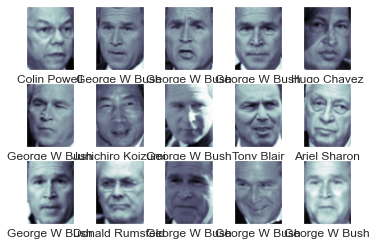

In [70]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

Cada imagem cont√©m [62√ó47] ou quase 3.000 pixels. Poder√≠amos prosseguir simplesmente usando cada valor de pixel como uma caracter√≠stica, mas muitas vezes √© mais eficaz usar algum tipo de pr√©-processador para extrair caracter√≠sticas mais significativas; aqui usaremos uma an√°lise de componentes principais para extrair 150 componentes fundamentais para alimentar nosso classificador SMV. Podemos fazer isso de forma mais direta, agrupando o pr√©-processador e o classificador em uma √∫nica pipeline:

In [71]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

Para testar nossa sa√≠da de classificadores, vamos dividir os dados em um conjunto de treinamento e testes:

In [72]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

Finalmente, podemos usar uma valida√ß√£o cruzada de busca em grade para explorar combina√ß√µes de par√¢metros. Aqui ajustaremos C (que controla a suavidade da margem) e gama (que controla o tamanho do n√∫cleo da fun√ß√£o de kernel), e determinaremos o melhor modelo:

In [73]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: user 1min 36s, sys: 25 s, total: 2min 1s
Wall time: 21 s
{'svc__C': 10, 'svc__gamma': 0.001}


Agora com este modelo validado, podemos prever as classes para os dados de teste, o que o modelo ainda n√£o viu:

In [74]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Vamos dar uma olhada em algumas das imagens de teste juntamente com seus valores previstos:

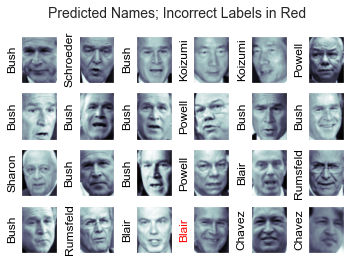

In [75]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

Desta pequena amostra, nosso estimador ideal rotulava erroneamente apenas uma √∫nica face (a face de Bush na fila inferior era rotulada erroneamente como Blair). Podemos ter uma melhor no√ß√£o do desempenho de nosso estimador usando o relat√≥rio de classifica√ß√£o, que lista as estat√≠sticas de recupera√ß√£o etiqueta por etiqueta:

In [76]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



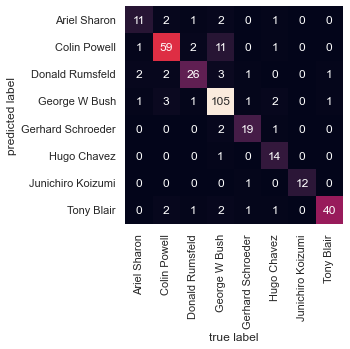

In [77]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Isto nos ajuda a ter uma no√ß√£o de quais classes podem ser confundidas pelo modelo.

Para uma tarefa de reconhecimento facial no mundo real, na qual as fotos n√£o v√™m pr√©-cortadas em grades agrad√°veis, a √∫nica diferen√ßa no esquema de classifica√ß√£o facial √© a sele√ß√£o de caracter√≠sticas: seria necess√°rio usar um algoritmo mais sofisticado para encontrar as faces e extrair caracter√≠sticas que s√£o independentes da pixela√ß√£o. Para este tipo de aplica√ß√£o, uma boa op√ß√£o √© fazer uso do OpenCV, que, entre outras coisas, inclui implementa√ß√µes pr√©-treinadas de ferramentas de extra√ß√£o de recursos de √∫ltima gera√ß√£o para imagens em geral e rostos em particular.

## Resumo
Vimos aqui uma breve introdu√ß√£o intuitiva aos princ√≠pios por tr√°s das m√°quinas vetoriais de suporte. Estes m√©todos s√£o um poderoso m√©todo de classifica√ß√£o por uma s√©rie de raz√µes:

- Sua depend√™ncia de relativamente poucos vetores de suporte significa que eles s√£o modelos muito compactos, e ocupam muito pouca mem√≥ria.
- Uma vez que o modelo √© treinado, a fase de previs√£o √© muito r√°pida.
- Por serem afetados apenas por pontos pr√≥ximos √† margem, eles trabalham bem com dados de alta dimens√£o - mesmo dados com mais dimens√µes do que amostras, o que √© um regime desafiador para outros algoritmos.
- Sua integra√ß√£o com os m√©todos de kernel os torna muito vers√°teis, capazes de se adaptar a muitos tipos de dados.


Entretanto, as SVMs tamb√©m t√™m algumas desvantagens:

- O dimensionamento com o n√∫mero de amostras ùëÅ √© [ùëÅ3] na pior das hip√≥teses, ou [ùëÅ2] para implementa√ß√µes eficientes. Para um grande n√∫mero de amostras de treinamento, este custo computacional pode ser proibitivo.
- Os resultados dependem fortemente de uma escolha adequada para o par√¢metro de suavizacao ùê∂ . Isto deve ser cuidadosamente escolhido atrav√©s de valida√ß√£o cruzada, que pode ser cara √† medida que os conjuntos de dados crescem em tamanho.

